Project Title Insurance Premium Prediction

Technologies Machine Learning Technology
Domain Insurance
Project Difficulties level Intermediate

Problem Statement:
The goal of this project is to give people an estimate of how much they need based on
their individual health situation. After that, customers can work with any health
insurance carrier and its plans and perks while keeping the projected cost from our
study in mind. This can assist a person in concentrating on the health side of an
insurance policy rather han the ineffective part.

Approach: The classical machine learning tasks like Data Exploration, Data Cleaning,
Feature Engineering, Model Building and Model Testing. Try out different machine
learning algorithms thats best fit for the above case.
Some Famous Algorithms: - Multiple Linear Regression, Decision tree Regression and
Gradient Boosting, Decision tree, Regression


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML_Datasets/insurance.csv')

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.shape

(1338, 7)

In [ ]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [ ]:
data.duplicated().sum().any()

True

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
data.describe()

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


In [ ]:
categorical = []
for column in data.columns:
  if data[column].dtype =="object":
    categorical.append(column)

print(categorical)

['sex', 'smoker', 'region']


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
oe.inverse_transform(data[categorical])

array([['female', 'yes', 'southwest'],
       ['male', 'no', 'southeast'],
       ['male', 'no', 'southeast'],
       ...,
       ['female', 'no', 'southeast'],
       ['female', 'no', 'southwest'],
       ['female', 'yes', 'northwest']], dtype=object)

In [ ]:
oe.categories_

[array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
data.describe()

,age,sex,bmi,children,smoker,region,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.665520,1.095737,0.204936,1.516081,13279.121638
std,14.044333,0.500163,6.100664,1.205571,0.403806,1.105208,12110.359657
min,18.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1121.870000
25%,27.000000,0.000000,26.300000,0.000000,0.000000,1.000000,4746.340000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.160000
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.720000
max,64.000000,1.000000,53.100000,5.000000,1.000000,3.000000,63770.430000


In [ ]:
oe = OrdinalEncoder().fit(data[categorical])
data[categorical] = oe.transform(data[categorical])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   float64
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   float64
 5   region    1337 non-null   float64
 6   expenses  1337 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 83.6 KB


In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0.0,27.9,0,1.0,3.0,16884.92
1,18,1.0,33.8,1,0.0,2.0,1725.55
2,28,1.0,33.0,3,0.0,2.0,4449.46
3,33,1.0,22.7,0,0.0,1.0,21984.47
4,32,1.0,28.9,0,0.0,1.0,3866.86


In [ ]:
data.describe()

,age,sex,bmi,children,smoker,region,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.665520,1.095737,0.204936,1.516081,13279.121638
std,14.044333,0.500163,6.100664,1.205571,0.403806,1.105208,12110.359657
min,18.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1121.870000
25%,27.000000,0.000000,26.300000,0.000000,0.000000,1.000000,4746.340000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.160000
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.720000
max,64.000000,1.000000,53.100000,5.000000,1.000000,3.000000,63770.430000


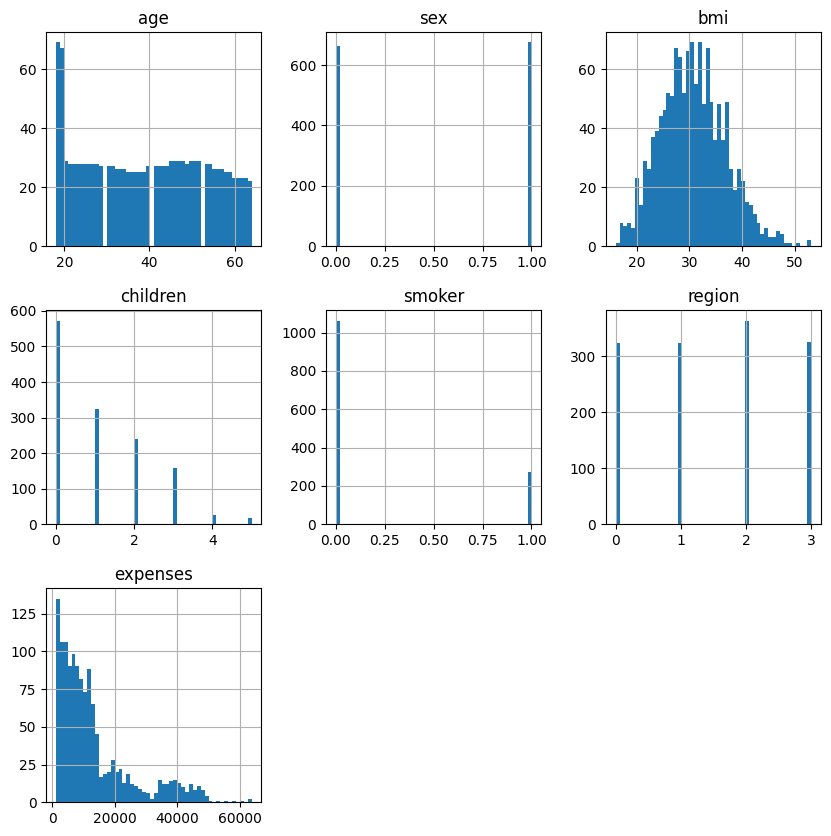

In [ ]:
import matplotlib.pyplot as plt

data.hist(bins=50,figsize=(10,10))
plt.show()

<Axes: xlabel='sex', ylabel='expenses'>

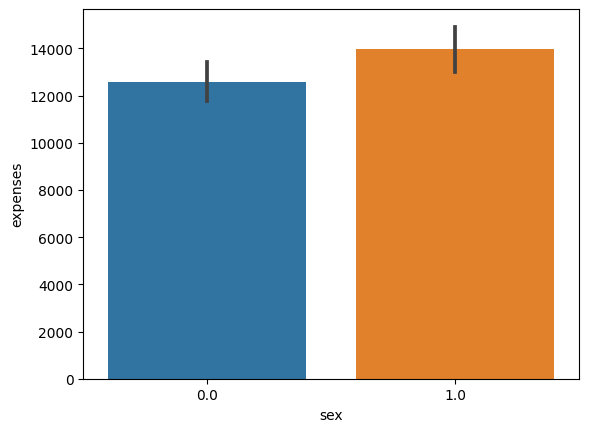

In [ ]:
sns.barplot(x='sex',y='expenses',data=data)


<Axes: xlabel='smoker', ylabel='expenses'>

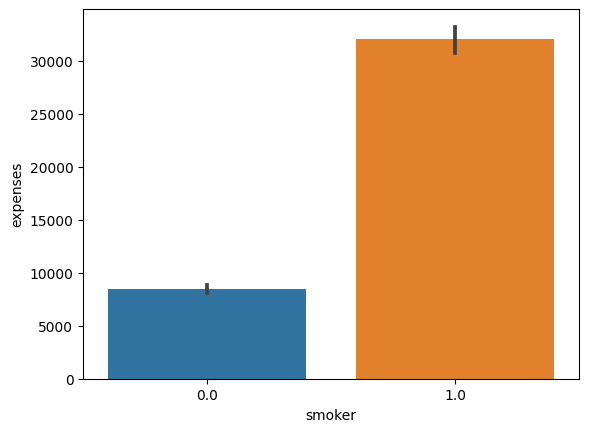

In [ ]:
sns.barplot(x='smoker',y='expenses',data=data)

<Axes: xlabel='region', ylabel='expenses'>

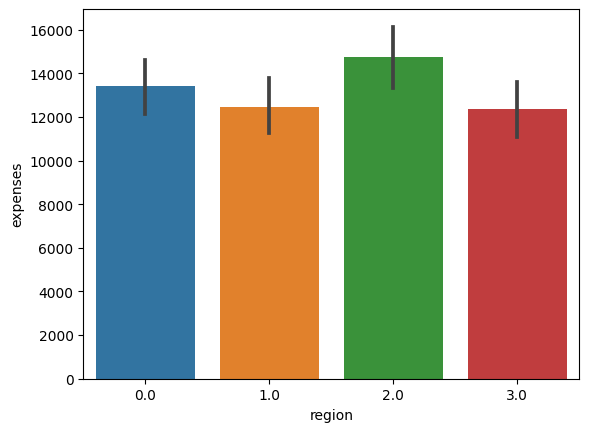

In [ ]:
sns.barplot(x='region',y='expenses',data=data)

<Axes: xlabel='age', ylabel='Count'>

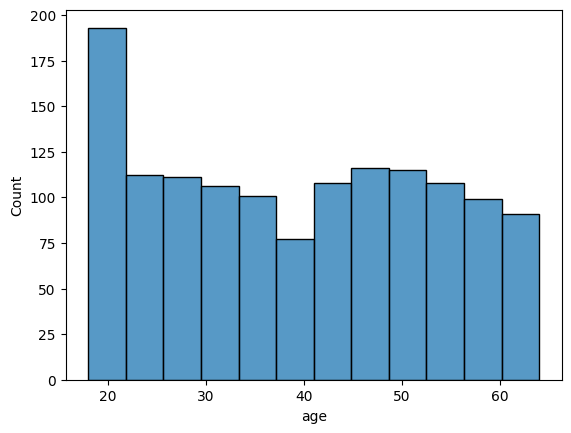

In [ ]:
sns.histplot(data.age)

<ipython-input-37-868c85374ad7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.age)


<Axes: xlabel='age', ylabel='Density'>

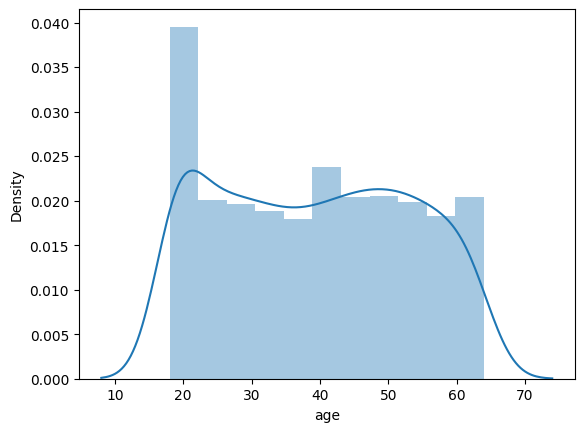

In [ ]:
sns.distplot(data.age)

<Axes: xlabel='bmi', ylabel='Count'>

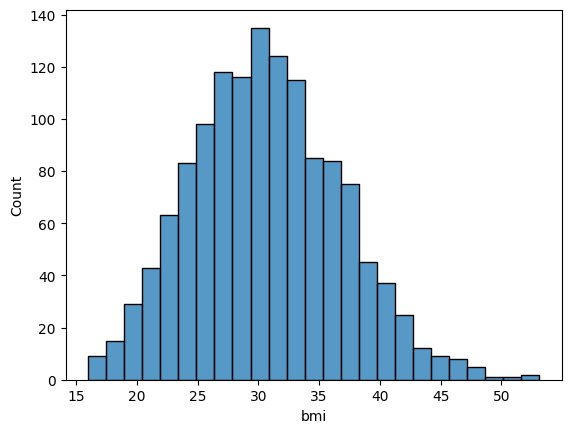

In [ ]:
sns.histplot(data.bmi)


<ipython-input-40-17bb2a06c9a8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.bmi)


<Axes: xlabel='bmi', ylabel='Density'>

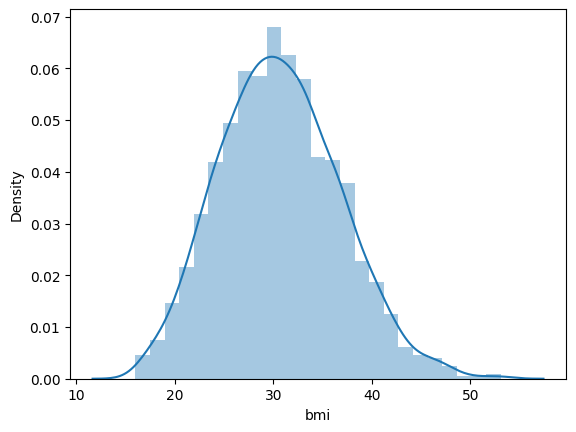

In [ ]:
sns.distplot(data.bmi)

<Axes: xlabel='children', ylabel='count'>

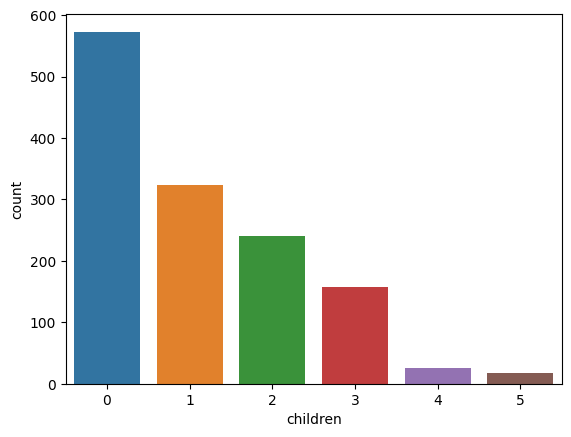

In [ ]:
sns.countplot(x=data.children,data=data)

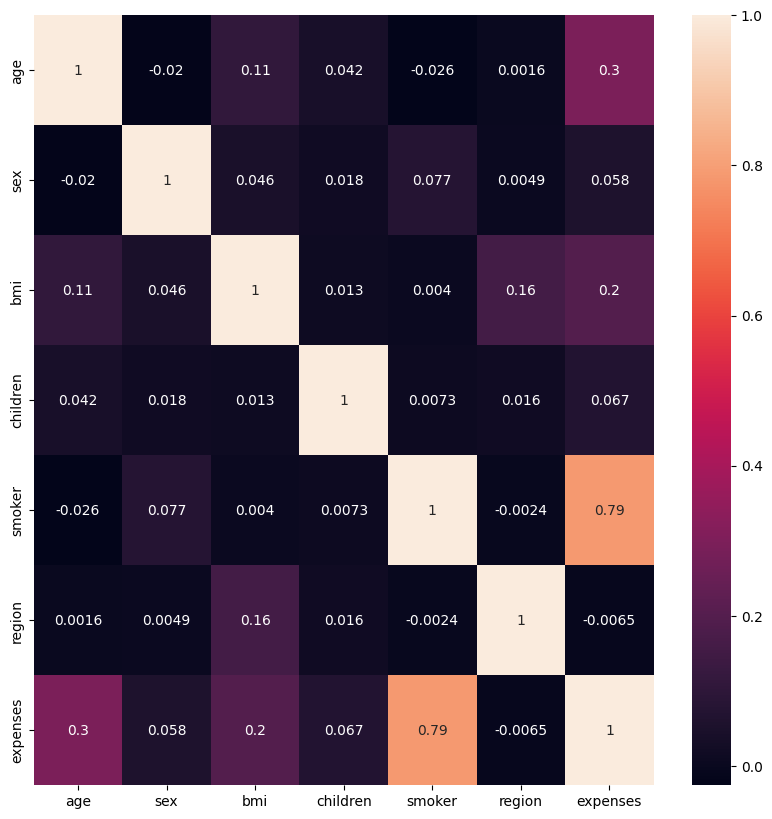

In [ ]:
corr_data = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_data,annot=True)
plt.show()

<Axes: xlabel='age', ylabel='bmi'>

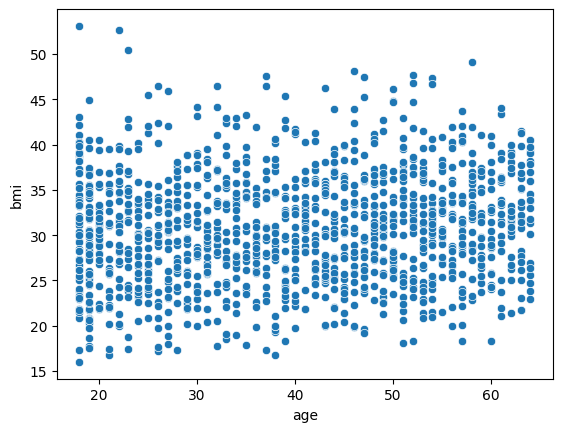

In [ ]:
sns.scatterplot(x=data["age"], y=data["bmi"],data=data)


<Axes: xlabel='age', ylabel='bmi'>

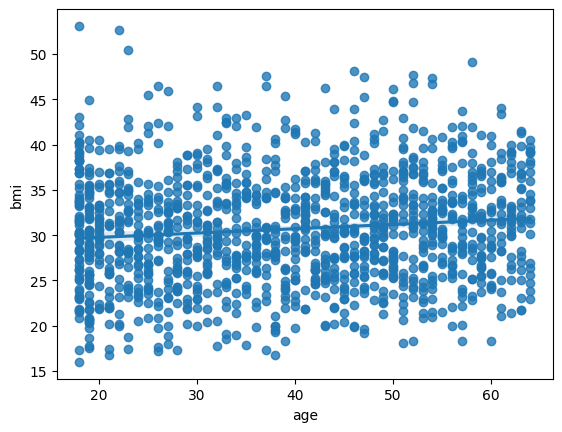

In [ ]:
sns.regplot(x=data["age"], y=data["bmi"],data=data)

<Axes: xlabel='age', ylabel='expenses'>

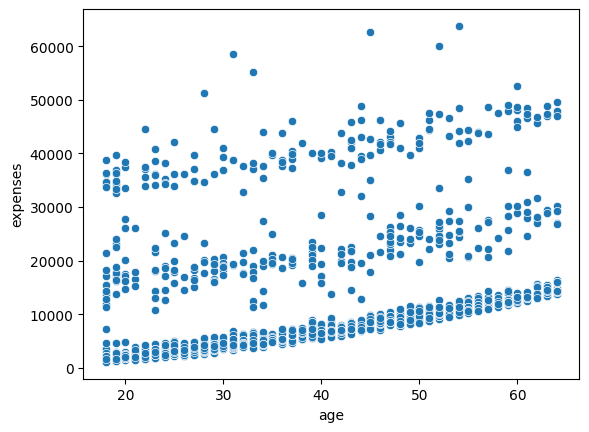

In [ ]:
sns.scatterplot(x=data["age"], y=data["expenses"],data=data)

<Axes: xlabel='age', ylabel='expenses'>

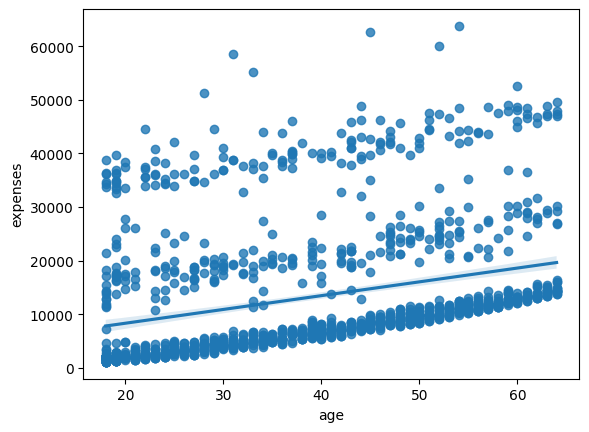

In [ ]:
sns.regplot(x=data["age"], y=data["expenses"],data=data)

<Axes: xlabel='bmi', ylabel='expenses'>

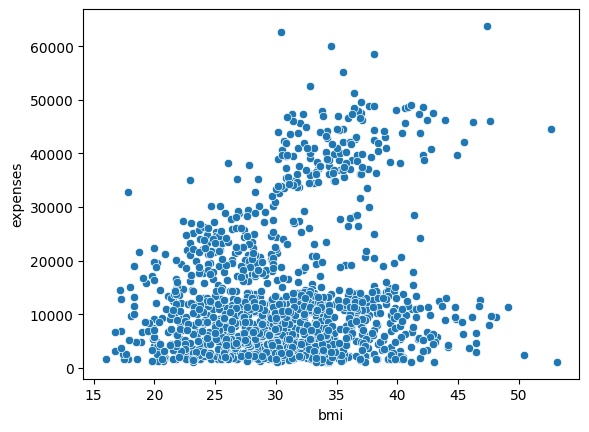

In [ ]:
sns.scatterplot(x=data["bmi"], y=data["expenses"],data=data)

<Axes: xlabel='bmi', ylabel='expenses'>

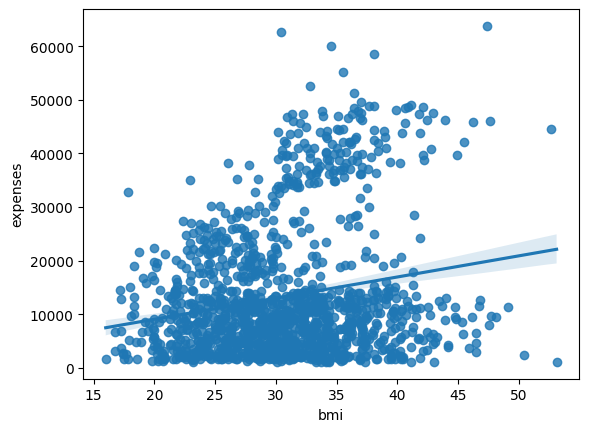

In [ ]:
sns.regplot(x=data["bmi"], y=data["expenses"],data=data)

<Axes: xlabel='age', ylabel='bmi'>

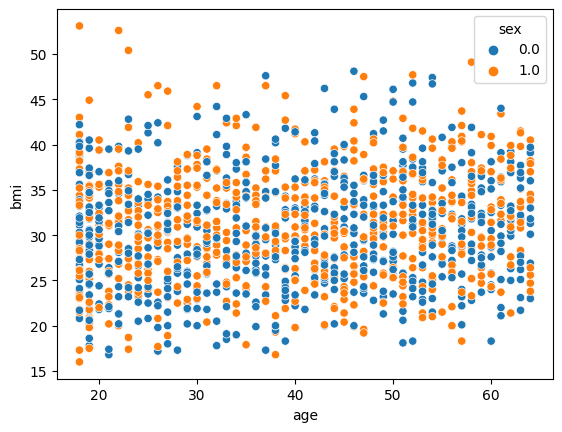

In [ ]:
sns.scatterplot(x=data["age"], y=data["bmi"], hue=data["sex"])

<Axes: xlabel='age', ylabel='expenses'>

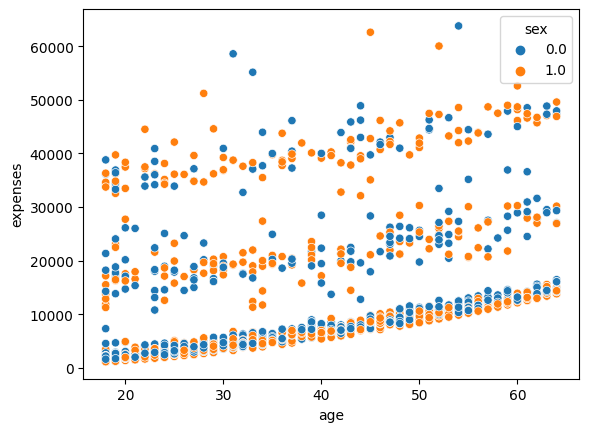

In [ ]:
sns.scatterplot(x=data["age"], y=data["expenses"], hue=data["sex"])

<Axes: xlabel='bmi', ylabel='expenses'>

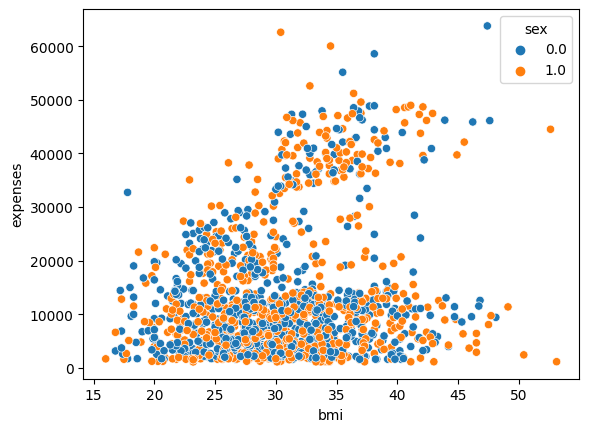

In [ ]:
sns.scatterplot(x=data["bmi"], y=data["expenses"], hue=data["sex"])

<Axes: xlabel='age', ylabel='bmi'>

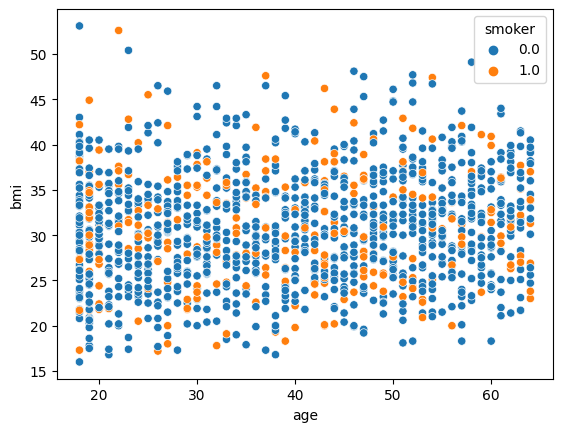

In [ ]:
sns.scatterplot(x=data["age"], y=data["bmi"], hue=data["smoker"])

<Axes: xlabel='age', ylabel='expenses'>

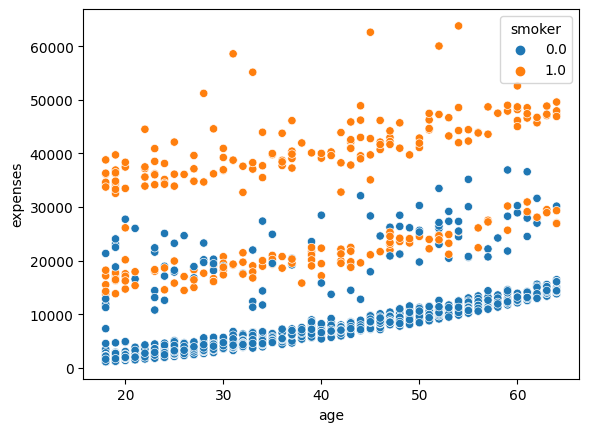

In [ ]:
sns.scatterplot(x=data["age"], y=data["expenses"], hue=data["smoker"])

<Axes: xlabel='bmi', ylabel='expenses'>

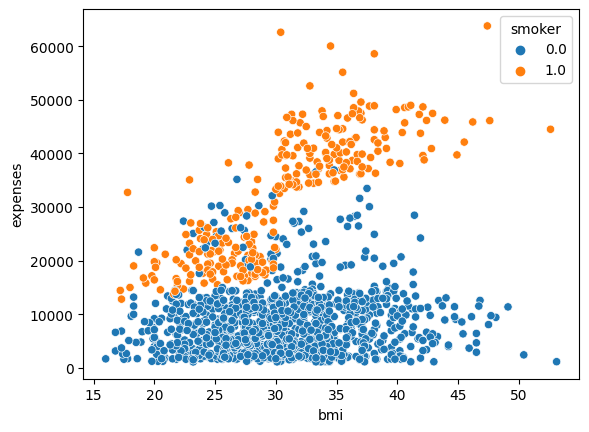

In [ ]:
sns.scatterplot(x=data["bmi"], y=data["expenses"], hue=data["smoker"])

In [ ]:
X = data.drop("expenses",axis = 1)
y = data.expenses

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1069, 6)
(268, 6)
(1069,)
(268,)


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred1 = lr.predict(X_test)

In [ ]:
y_pred1

array([ 5244.43007684,  9622.66252464, 11279.78451206, 26128.57500707,
        7000.69853073,   564.40637067,  1840.77238956, -1255.02084837,
        2018.08879042, 14380.55965787,  9895.09723927, 26853.24093853,
       14205.29786999,  9508.51188332,  5478.23639809, 10024.31777897,
        6046.45840418,  5998.09537086,  4588.97536867, 14768.41792627,
        2656.29861186, 12205.93240163,  2010.95457172,  4303.75615243,
        4169.57443767,  8943.27401537,  1511.51835604, 12486.68165471,
        4076.93370041, 29871.0413464 ,  9065.74016751, 38822.2092767 ,
        8495.4868649 , 12934.3979765 , 25290.48748318, 15732.72111888,
       12381.70424833, 30325.22953387,  6777.40757759,  3352.5384383 ,
       27252.03306902,  4062.34096968,  5742.36770145, 39092.89546372,
       28121.42036885, 11722.82689722, 10854.26467735, 10012.69733386,
       13334.16043126,  6895.57840487, 33623.32184645,  5266.24256907,
       32624.58599823, 33218.94165939, 15666.43880178,  3744.02079825,
      

In [ ]:
print("MSE : ",mean_squared_error(y_pred1,y_test))
print("MAE : ",mean_absolute_error(y_pred1,y_test))
print("R Score :",r2_score(y_pred1,y_test))

MSE :  41606088.58896104
MAE :  4400.631683776516
R Score : 0.6418891286789622


In [ ]:
svm = SVR(kernel = "linear")
svm.fit(X_train,y_train)
y_pred2 = svm.predict(X_test)

In [ ]:
y_pred2

array([ 1319.87613505,  9322.8645082 , 10011.17661104,  1763.73052118,
       10282.86656733,  3560.5221641 ,  1584.00338221,  1463.97021048,
        1988.99996266, 12095.68992942,  9334.29593092,  3637.03803158,
       13489.7268811 ,  8772.8821405 ,  6289.81487397,  2806.9312659 ,
        6263.19581476,  3882.38517059,  7372.51495744, 13703.50222661,
        1343.39774828, 12674.02083625,  1434.28817474,  2706.96197128,
        2336.9356615 ,  5466.95587375,  4272.55781902, 10735.94632901,
        4821.71736382,  2878.81766624,  8073.92711728, 10751.46381128,
       11311.93478964, 11003.03659962,  3414.25612111, 13791.06811576,
        9216.94835975,  4280.64798156,  9398.38600835,  1757.58559782,
        2255.27036966,  4217.80369044,  4206.29199677, 12745.49416745,
        1543.99669199,  9519.30737867, 10626.63767124,  7948.72396423,
       10246.76132459,  7888.66436601, 10915.30961464,  4775.54632494,
        9630.87501148,  5484.29008437, 11967.40656511,  3916.77816814,
      

In [ ]:
print("MSE : ",mean_squared_error(y_pred2,y_test))
print("MAE : ",mean_absolute_error(y_pred2,y_test))
print("R Score :",r2_score(y_pred2,y_test))

MSE :  191624396.13052744
MAE :  7424.349226600153
R Score : -12.975571584194432


In [ ]:
polynomial_features = PolynomialFeatures(degree=3)
x_train_poly = polynomial_features.fit_transform(X_train)
x_test_poly = polynomial_features.fit_transform(X_test)

polynomial_reg = LinearRegression(fit_intercept=False)
polynomial_reg.fit(x_train_poly, y_train)
y_pred3 = polynomial_reg.predict(x_test_poly)

In [ ]:
y_pred3

array([ 1643.35102878,  9921.95435112, 10923.21604949, 24144.79333656,
       12029.3254067 ,  5078.05187198,  3768.81149667,  1396.48893449,
        5092.65293998, 12889.71058682,  8929.38903746, 21232.22750905,
       14311.08867299,  9586.02760461,  6878.70089905,   538.69473567,
        5458.89480602,  6876.80193462,  8388.28721505, 14984.48814507,
        2015.28996791, 14446.75686034,  3008.55011469,  5324.82704313,
        3482.90318851,  8405.97759381,  6084.69518183, 13934.08704063,
        4410.45808182, 35104.39377027,  9198.7509383 , 52099.40436423,
       12649.59535637, 10606.07618406, 14035.75990299, 18356.10619063,
       10257.00791669, 37881.82130509, 11345.3319544 ,  3274.23064091,
       26932.88966788,  3996.93017023,  9000.07919312, 48110.1690286 ,
       36013.87519262,  9263.22336552, 11797.51128496,  8781.03647968,
       10358.66209303,  7924.92563807, 27167.03675065,  5200.86284922,
       31285.85735452, 41023.16590268, 11753.48151112,  3634.09114446,
      

In [ ]:
print("MSE : ",mean_squared_error(y_pred3,y_test))
print("MAE : ",mean_absolute_error(y_pred3,y_test))
print("R Score :",r2_score(y_pred3,y_test))

MSE :  26655241.3592814
MAE :  3138.258604220515
R Score : 0.8205076935874949


In [ ]:
decision_tree_reg = DecisionTreeRegressor(max_depth=5, random_state=13)
decision_tree_reg.fit(X_train, y_train)
y_pred4 = decision_tree_reg.predict(X_test)

In [ ]:
y_pred4

array([ 3532.21265823, 10408.92348485, 10408.92348485, 34532.98181818,
       10408.92348485, 21595.38      ,  1899.33318182,  1899.33318182,
        1899.33318182, 12471.52723684, 10408.92348485, 19151.97487805,
       13778.24032258, 10408.92348485,  6222.19830601,  6222.19830601,
        4800.76735294,  9592.51976744,  9592.51976744, 13778.24032258,
        3532.21265823, 12471.52723684,  3532.21265823,  3532.21265823,
        3532.21265823,  9592.51976744, 21595.38      , 10408.92348485,
        4800.76735294, 40046.63166667,  6222.19830601, 46664.32576923,
       12471.52723684, 12471.52723684, 19151.97487805, 14875.44291667,
        8385.20266667, 37333.75555556, 10408.92348485,  3532.21265823,
       34532.98181818,  4800.76735294,  9592.51976744, 46664.32576923,
       37333.75555556,  8385.20266667, 10408.92348485,  6222.19830601,
        9663.55181818,  9592.51976744, 24582.06117647,  4800.76735294,
       26952.09952381, 40046.63166667, 12471.52723684,  4800.76735294,
      

In [ ]:
print("MSE : ",mean_squared_error(y_pred4,y_test))
print("MAE : ",mean_absolute_error(y_pred4,y_test))
print("R Score :",r2_score(y_pred4,y_test))

MSE :  32638530.515914433
MAE :  3324.7174335850355
R Score : 0.771197970302817


In [ ]:
random_forest_reg = RandomForestRegressor(n_estimators=400, max_depth=5, random_state=13)
random_forest_reg.fit(X_train, y_train)
y_pred5 = random_forest_reg.predict(X_test)

In [ ]:
y_pred5

array([ 3205.88628811, 11493.84253892, 10721.88640074, 34925.21690617,
       10739.23311716,  7673.66339706,  2684.81567265,  2370.68149742,
        3639.85545749, 12168.869611  , 10170.53074424, 17891.77578152,
       14206.56375476,  9518.72827394,  6147.92260803,  5432.28370431,
        5558.73404206,  7487.74638247,  7906.55863659, 14014.53115054,
        3121.39932384, 14357.22547341,  2953.01509463,  4395.44838176,
        3096.50544479,  7999.78659601,  8240.31258517, 10388.76950043,
        4849.67552346, 36852.6208305 ,  7051.55437972, 45821.38828826,
       12274.35730024, 12309.84312594, 17870.08756077, 14661.17855302,
        9407.21052687, 37372.4428227 , 10906.55612239,  3229.90996349,
       34950.14468647,  4811.25937439,  8147.19745666, 46267.35681602,
       37226.33509311,  9890.3324995 , 10863.82923598,  6999.95158581,
       10069.4815975 ,  8037.97087514, 24251.43762494,  5399.37546118,
       26627.59329815, 41222.14587585, 12249.95384421,  5219.85620014,
      

In [ ]:
print("MSE : ",mean_squared_error(y_pred5,y_test))
print("MAE : ",mean_absolute_error(y_pred5,y_test))
print("R Score :",r2_score(y_pred5,y_test))

MSE :  25771208.79724831
MAE :  2922.9214731653133
R Score : 0.8128519775521816


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gradboost = GradientBoostingRegressor()
gradboost.fit(X_train, y_train)

y_pred6 = gradboost.predict(X_test)

In [ ]:
y_pred6

array([ 2241.92630339, 10438.83053635, 11145.73531956, 33861.36557065,
        9786.81122243,  6455.3273303 ,  2815.34600386,   847.14091158,
        3963.58385632, 12633.27759177,  9881.76400082, 18845.44980996,
       14262.97329499,  9954.28914005,  5749.14666646,  4434.43522122,
        5288.06803222,  6969.61325063,  5556.12242933, 14368.88211323,
        2485.094027  , 15709.74231713,  2551.89473477,  4420.22072425,
        3075.97967365,  7492.49084611,  5221.80640462, 11045.18085706,
        4297.62825545, 37243.06319589,  8089.94858867, 46198.47395303,
       11159.2448412 , 11053.20073484, 16870.90901093, 15559.82537492,
       10596.14367543, 36837.05994721,  9551.62036082,  2380.98749582,
       34232.32481313,  4043.77245245,  7800.84467828, 46697.56472976,
       36603.17707225,  9716.71856214, 10876.70592751,  7898.48326398,
        9214.79071974,  8633.81292232, 25280.69434907,  5180.69762308,
       28220.61667842, 40495.83688891, 11459.77579236,  5270.57363354,
      

In [ ]:
print("MSE : ",mean_squared_error(y_pred6,y_test))
print("MAE : ",mean_absolute_error(y_pred6,y_test))
print("R Score :",r2_score(y_pred6,y_test))

MSE :  25610530.804263514
MAE :  2788.6382112676406
R Score : 0.8169090863663591


In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(0.1)
lasso.fit(X_train, y_train)

y_pred7 = lasso.predict(X_test)

In [ ]:
y_pred7

array([ 5244.39470075,  9622.63548939, 11279.99706101, 26128.40462118,
        7000.73650912,   564.87906806,  1840.65903906, -1254.38571303,
        2017.99905415, 14380.46114857,  9895.12764264, 26853.09459666,
       14205.58097772,  9508.41172747,  5478.32411729, 10024.56645481,
        6046.43042034,  5998.29888527,  4589.22597848, 14768.34565322,
        2656.32566476, 12206.00020785,  2011.51092762,  4304.05684598,
        4170.01648342,  8943.44208025,  1511.47226736, 12486.4451247 ,
        4077.00360155, 29870.53234771,  9065.48884838, 38821.80637153,
        8496.10628898, 12934.90439647, 25289.77913095, 15732.45551472,
       12381.97441847, 30325.03326657,  6777.79690305,  3352.64059844,
       27251.68144097,  4062.8271259 ,  5742.09153917, 39092.44751565,
       28120.768214  , 11723.24691248, 10854.10957403, 10012.5032104 ,
       13334.14763538,  6895.78524047, 33622.96430752,  5266.11777567,
       32624.45290716, 33218.06349534, 15666.38931292,  3744.34269387,
      

In [ ]:
print("MSE : ",mean_squared_error(y_pred7,y_test))
print("MAE : ",mean_absolute_error(y_pred7,y_test))
print("R Score :",r2_score(y_pred7,y_test))

MSE :  41606063.3171931
MAE :  4400.6623768838635
R Score : 0.6418750282383299


In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)

y_pred8 = ridge.predict(X_test)

In [ ]:
print("MSE : ",mean_squared_error(y_pred8,y_test))
print("MAE : ",mean_absolute_error(y_pred8,y_test))
print("R Score :",r2_score(y_pred8,y_test))

MSE :  41624006.73916646
MAE :  4411.533073829147
R Score : 0.6382042553648763
